Este cuaderno sirve para pruebas del servidor

In [1]:
import requests
import pandas as pd
from IPython.display import display, Image, JSON

BASE_URL = "http://localhost:5000"


In [2]:
# test carga dataset endpoint
resp = requests.post(
    f"{BASE_URL}/load_dataset",
    json={"path": "datasets/madrid_2001_2018_calidad_aire.csv"}
)
resp.raise_for_status()
data = resp.json()

print("→ Vista previa (primeras 10 filas):")
display(pd.DataFrame(data["preview"]))

print("\n→ Columnas:")
print(data["columns"])

print("\n→ Tipos de dato:")
for col, dt in data["dtypes"].items():
    print(f"  {col}: {dt}")

print("\n→ Log de limpieza:")
print("\n".join(data["cleaning_log"]))



→ Vista previa (primeras 10 filas):


,CO,NO,NO_2,NOx,O_3,PM10,SO_2,date,station
0,0.37,23.438864,58.400002,87.150002,34.529999,105.000000,6.34,"Wed, 01 Aug 2001 01:00:00 GMT",28079001
1,0.34,23.438864,56.250000,75.169998,42.160000,100.599998,8.11,"Wed, 01 Aug 2001 01:00:00 GMT",28079035
2,0.28,23.438864,50.660000,61.380001,46.310001,100.099998,7.85,"Wed, 01 Aug 2001 01:00:00 GMT",28079003
3,0.47,23.438864,69.790001,73.449997,40.650002,69.779999,6.46,"Wed, 01 Aug 2001 01:00:00 GMT",28079004
4,0.39,23.438864,22.830000,24.799999,66.309998,75.180000,8.80,"Wed, 01 Aug 2001 01:00:00 GMT",28079039
5,0.63,23.438864,66.260002,118.099998,33.500000,122.699997,6.36,"Wed, 01 Aug 2001 01:00:00 GMT",28079006
6,0.28,23.438864,35.799999,39.590000,68.250000,124.900002,5.23,"Wed, 01 Aug 2001 01:00:00 GMT",28079007
7,0.67,23.438864,74.830002,112.000000,26.410000,113.000000,11.61,"Wed, 01 Aug 2001 01:00:00 GMT",28079009
8,0.41,23.438864,33.209999,37.299999,62.299999,125.300003,10.87,"Wed, 01 Aug 2001 01:00:00 GMT",28079038
9,0.17,23.438864,24.129999,36.970001,46.200001,95.589996,3.89,"Wed, 01 Aug 2001 01:00:00 GMT",28079011



→ Columnas:
['date', 'CO', 'NO', 'NO_2', 'NOx', 'O_3', 'PM10', 'SO_2', 'station']

→ Tipos de dato:
  CO: float64
  NO: float64
  NO_2: float64
  NOx: float64
  O_3: float64
  PM10: float64
  SO_2: float64
  date: datetime64[ns]
  station: int64

→ Log de limpieza:
Columna 'date' convertida a datetime.
Columna 'BEN' eliminada (> 73% nulos).
Columna 'CH4' eliminada (> 100% nulos).
'CO' imputada con media.
Columna 'EBE' eliminada (> 74% nulos).
Columna 'MXY' eliminada (> 92% nulos).
Columna 'NMHC' eliminada (> 72% nulos).
'NO' imputada con media.
'NO_2' imputada con media.
'NOx' imputada con media.
Columna 'OXY' eliminada (> 92% nulos).
'O_3' imputada con media.
'PM10' imputada con media.
Columna 'PM25' eliminada (> 79% nulos).
Columna 'PXY' eliminada (> 92% nulos).
'SO_2' imputada con media.
Columna 'TCH' eliminada (> 71% nulos).
Columna 'TOL' eliminada (> 73% nulos).


In [3]:
# test endpoints processor
endpoints = [
    ("/columns",               {}),
    ("/dtypes",                {}),
    ("/info",                  {}),
    ("/null_percentages",      {}),
    ("/unique_counts",         {}),
    ("/unique_values",         {"n": 5}),
    ("/descriptive_stats",     {}),
]

for ep, params in endpoints:
    print(f"\n--- GET {ep} ---")
    r = requests.get(f"{BASE_URL}{ep}", params=params)
    r.raise_for_status()
    display(JSON(r.json()))





--- GET /columns ---


<IPython.core.display.JSON object>


--- GET /dtypes ---


<IPython.core.display.JSON object>


--- GET /info ---


<IPython.core.display.JSON object>


--- GET /null_percentages ---


<IPython.core.display.JSON object>


--- GET /unique_counts ---


<IPython.core.display.JSON object>


--- GET /unique_values ---


<IPython.core.display.JSON object>


--- GET /descriptive_stats ---


<IPython.core.display.JSON object>

C:\Users\ainoa\AppData\Roaming\Python\Python313\site-packages\jupyter_client\session.py:721: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant: nan
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


In [4]:
def show_plot(payload):
    r = requests.post(f"{BASE_URL}/graficar", json=payload)
    r.raise_for_status()
    display(Image(data=r.content))

→ Barras (Conteo por estación)


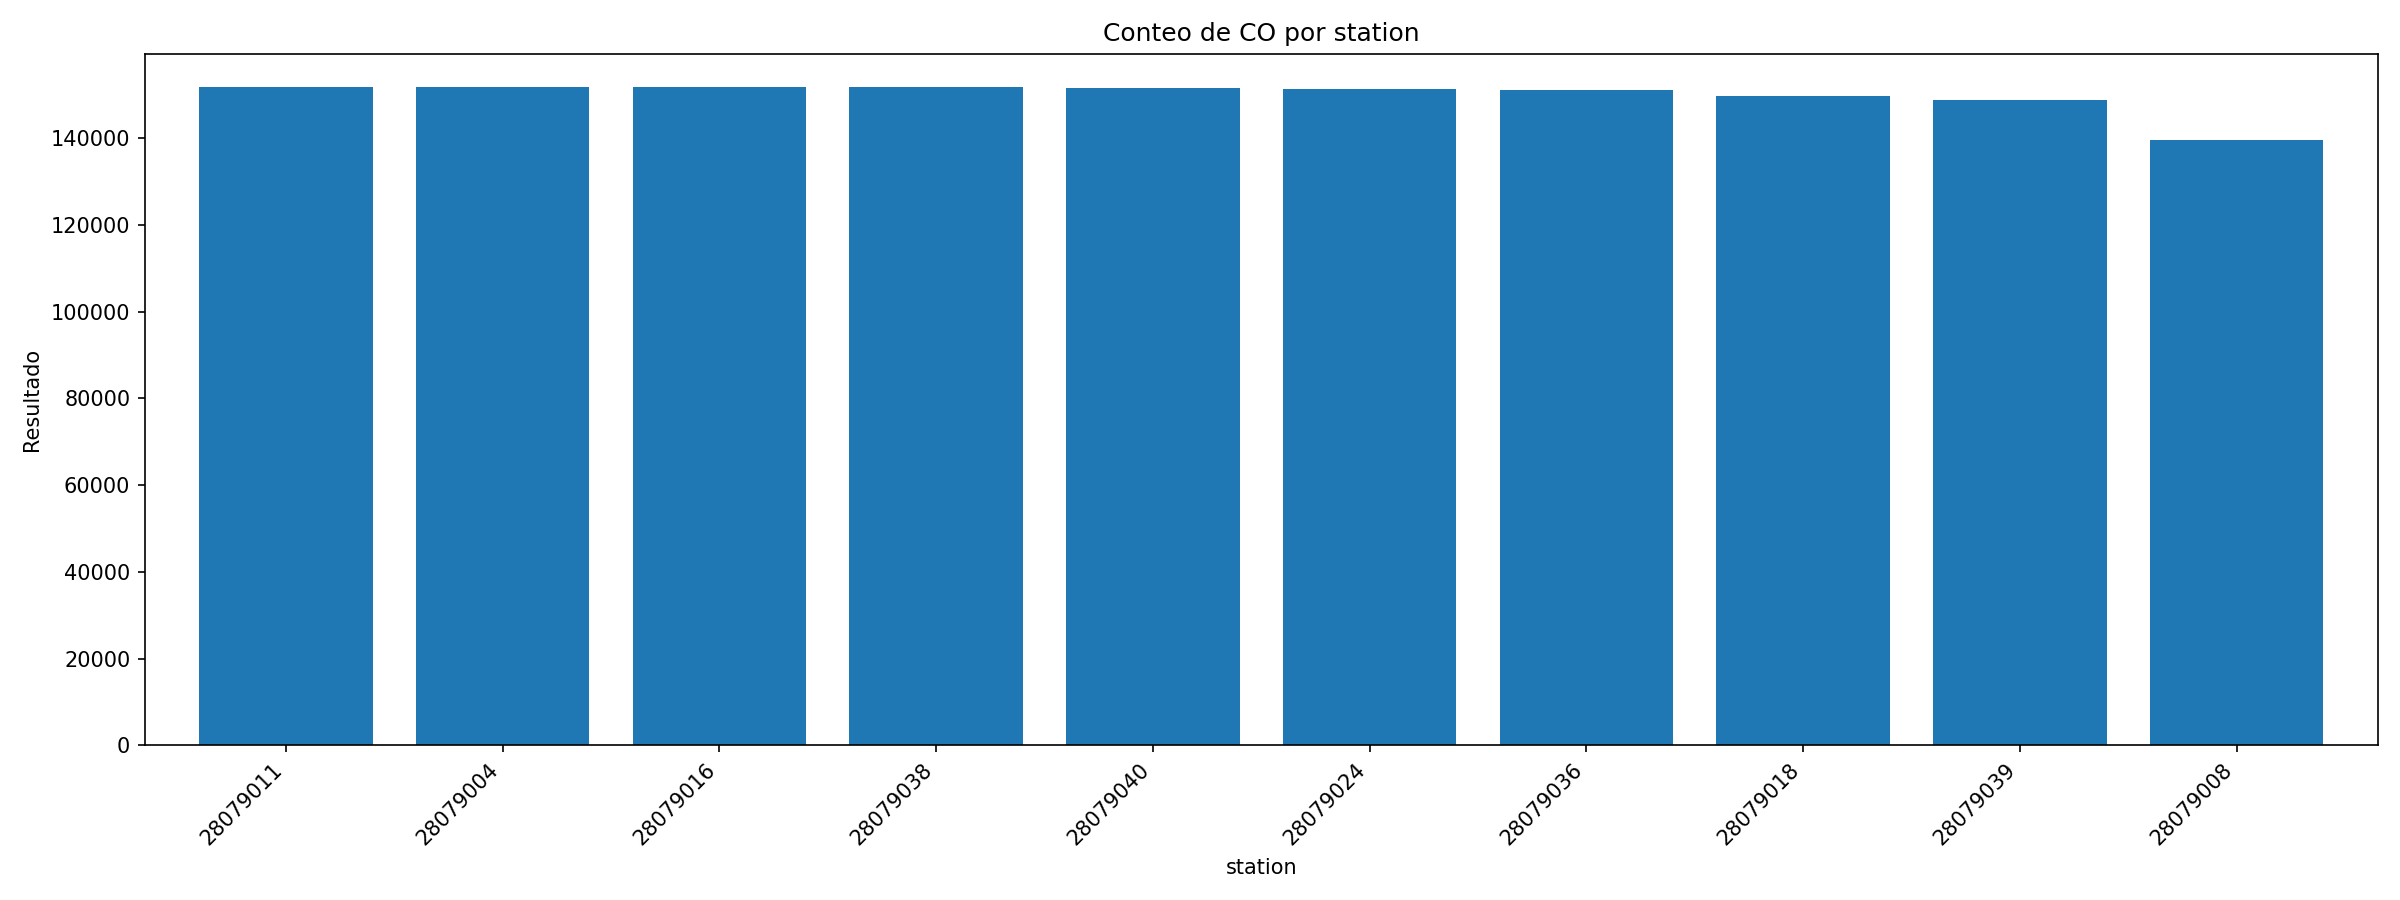

In [5]:
payload = {
  "tipo": "Barra",
  "columna_x": "station",
  "columna_y": "CO",    # se ignora en Conteo
  "agregacion": "Conteo"
}
print("→ Barras (Conteo por estación)")
show_plot(payload)

→ Barras agrupadas (Media de CO por estación y año)


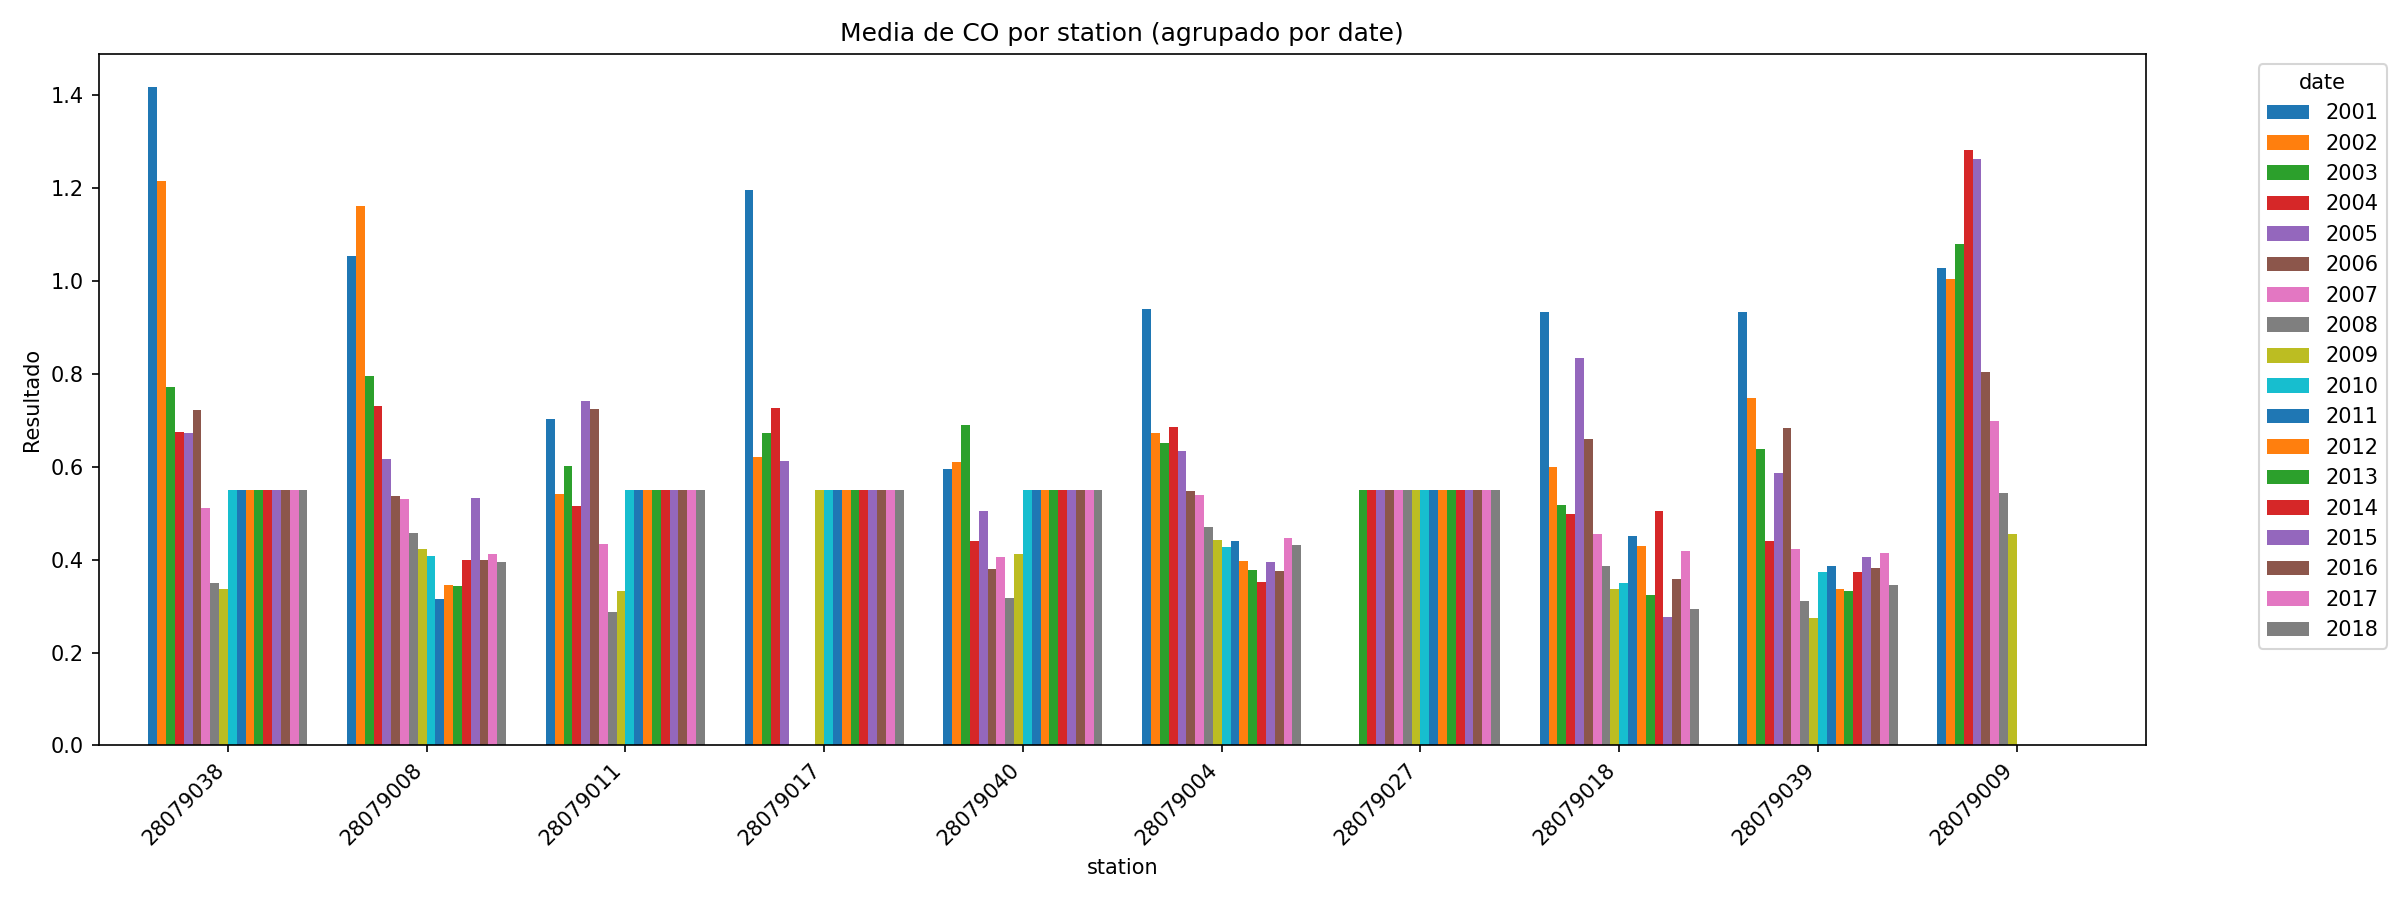

In [6]:
payload = {
    "tipo": "Barra",
    "columna_x":      "station",
    "columna_y":      "CO",
    "agregacion":     "Media",
    "grupo":          "date",
    "agrupacion_grupo_fecha": "Anual"
}
print("→ Barras agrupadas (Media de CO por estación y año)")
show_plot(payload)


→ Histograma de CO


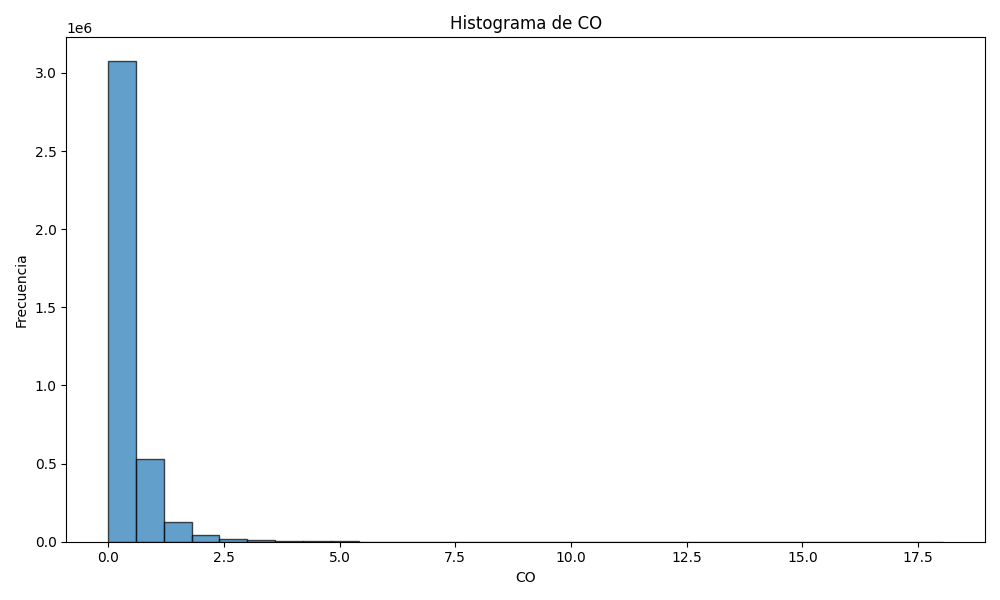

In [7]:
payload = {
  "tipo": "Histograma",
  "columna_y": "CO"
}
print("→ Histograma de CO")
show_plot(payload)


→ Scatter CO vs NO₂


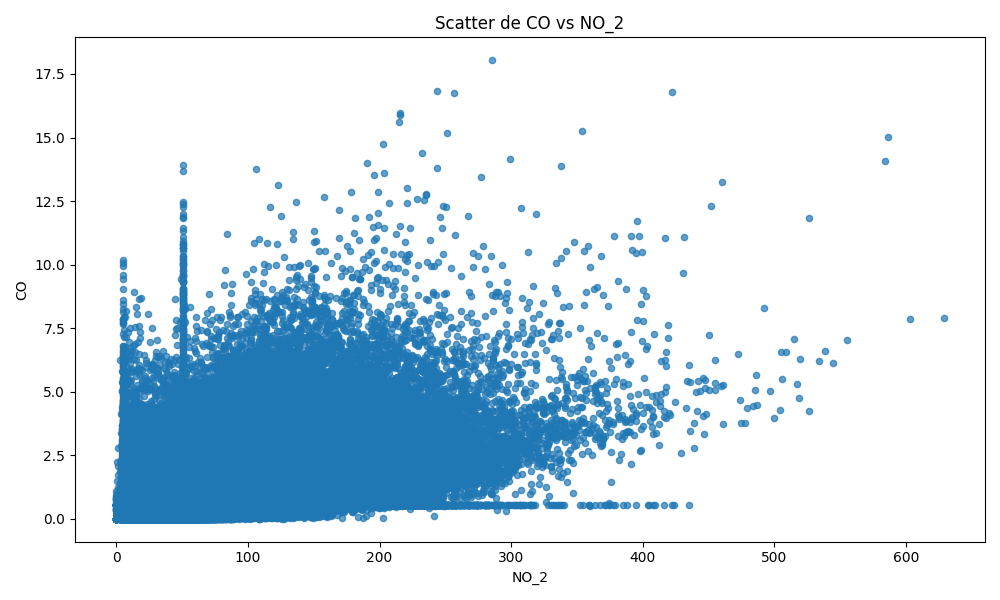

In [8]:
payload = {
  "tipo": "Scatter",
  "columna_x": "NO_2",
  "columna_y": "CO"
}
print("→ Scatter CO vs NO₂")
show_plot(payload)

→ Boxplot de PM10


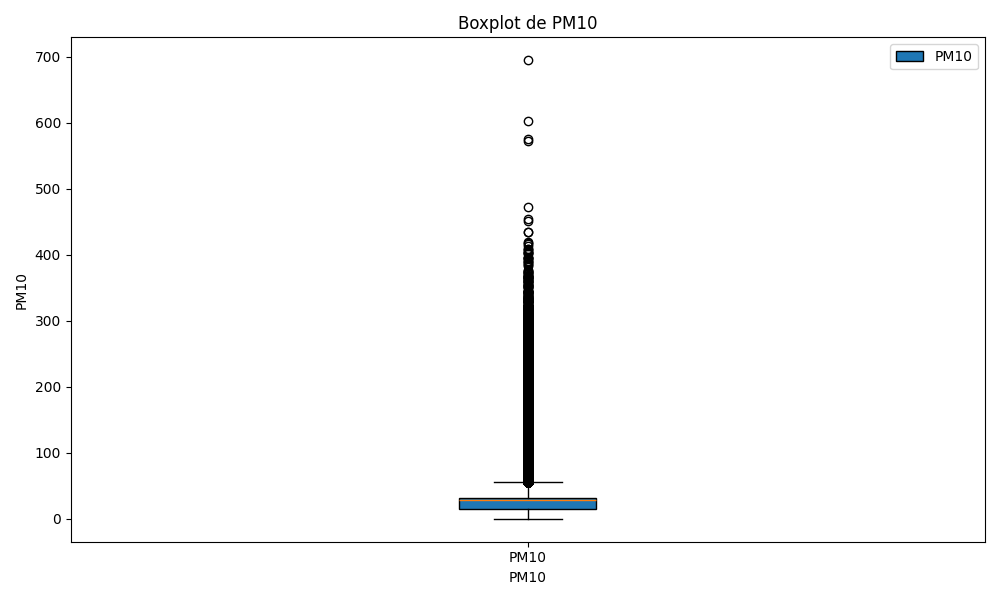

In [9]:
payload = {
  "tipo": "Boxplot",
  "columna_y": "PM10"
}
print("→ Boxplot de PM10")
show_plot(payload)

→ Correlograma


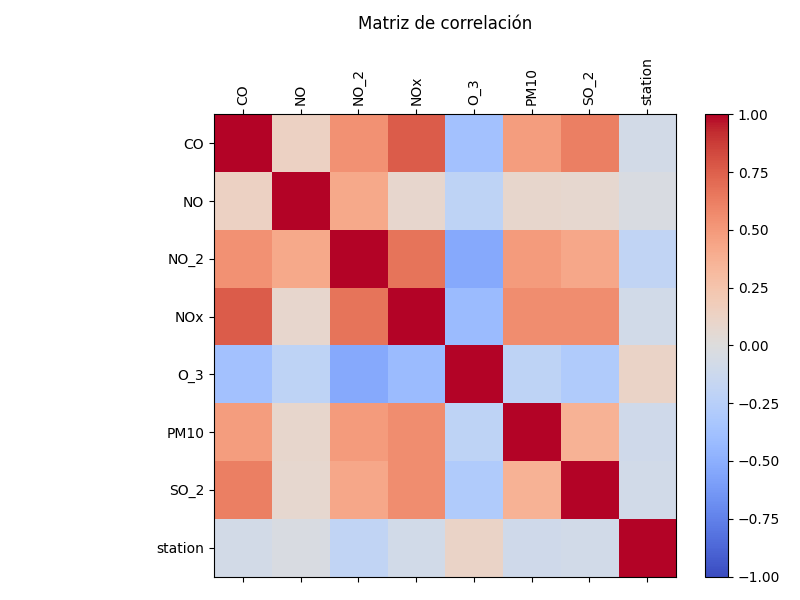

In [10]:
payload = {
  "tipo": "Correlograma"
}
print("→ Correlograma")
show_plot(payload)

→ Línea (Conteo anual de registros)


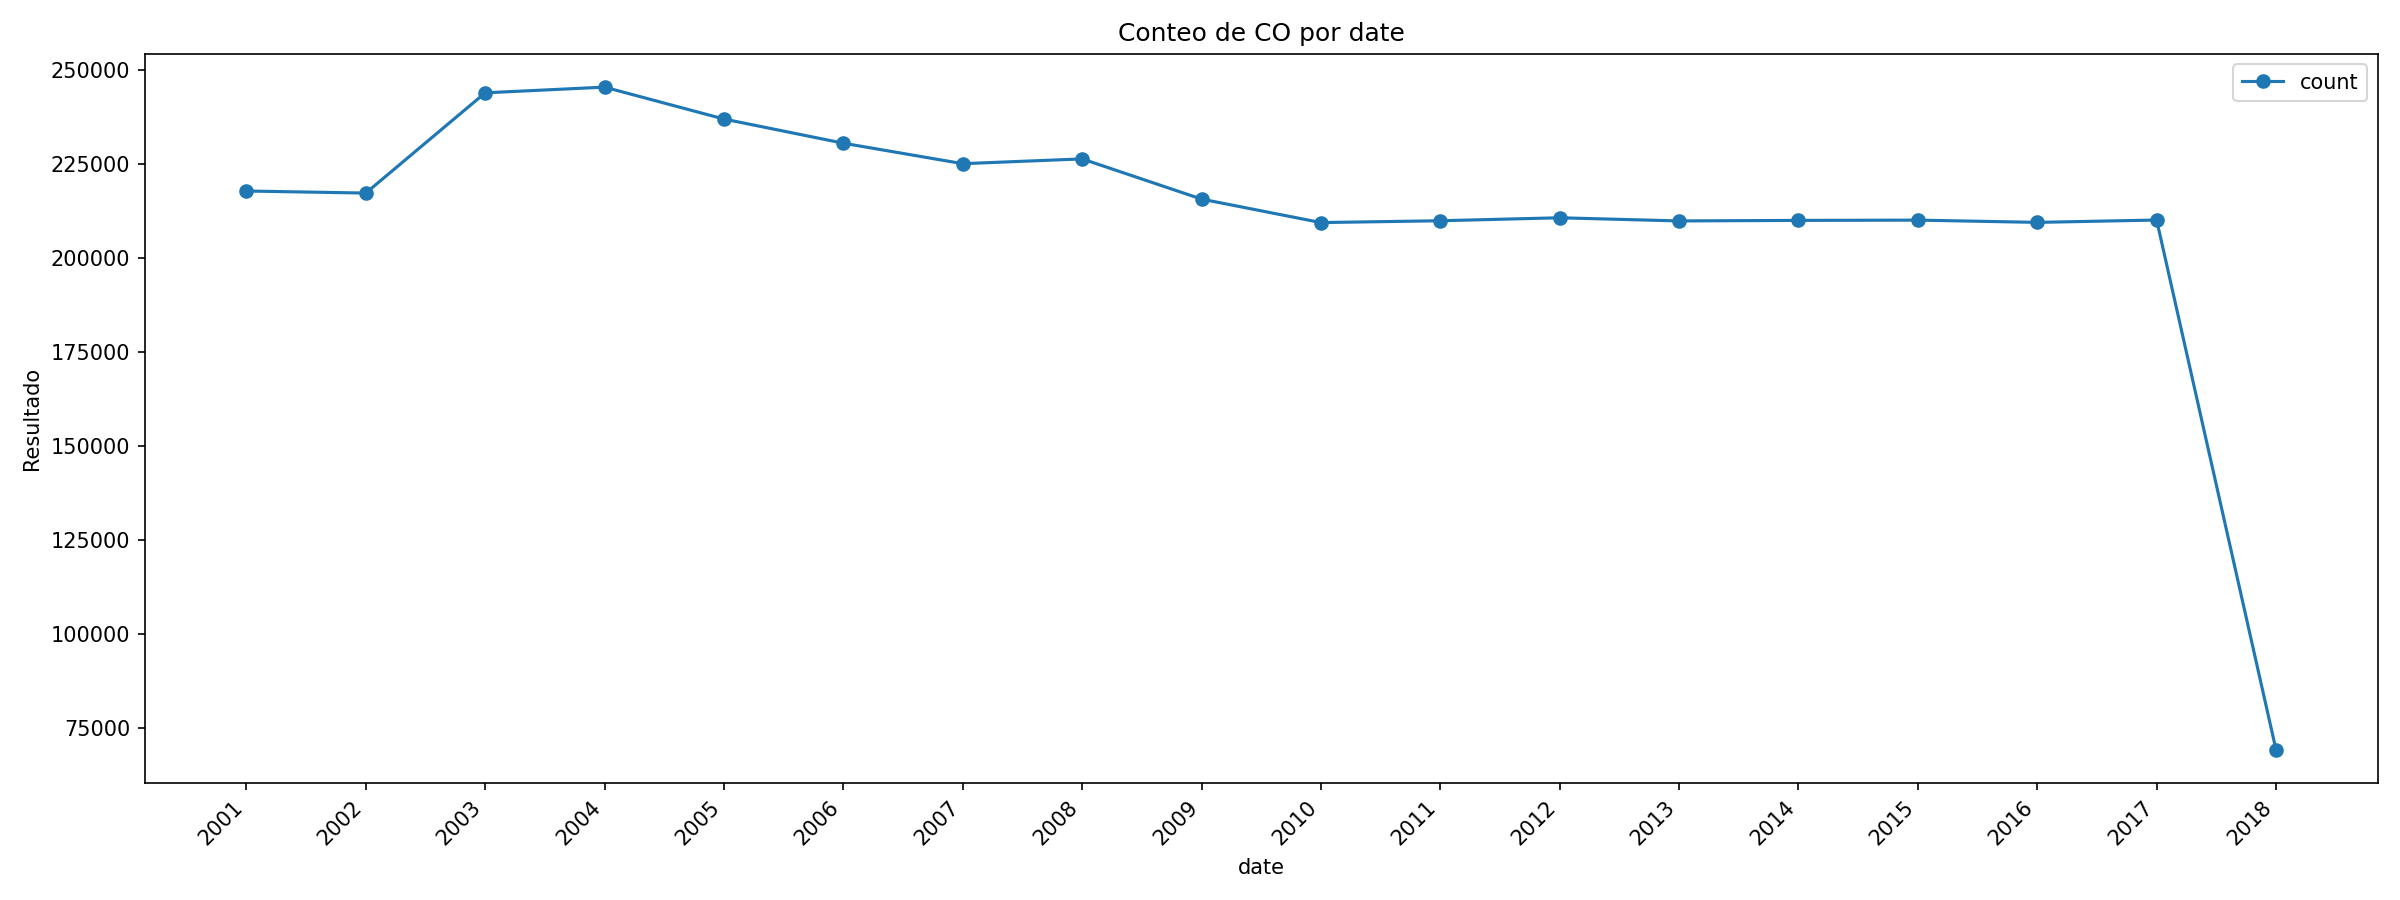

In [11]:
payload = {
    "tipo":               "Línea",
    "columna_x":          "date",
    "columna_y":          "CO",        # se ignora en Conteo
    "agregacion":         "Conteo",
    "agrupacion_fecha":   "Anual"
}
print("→ Línea (Conteo anual de registros)")
show_plot(payload)

→ Línea agrupada (Media mensual de CO por estación)


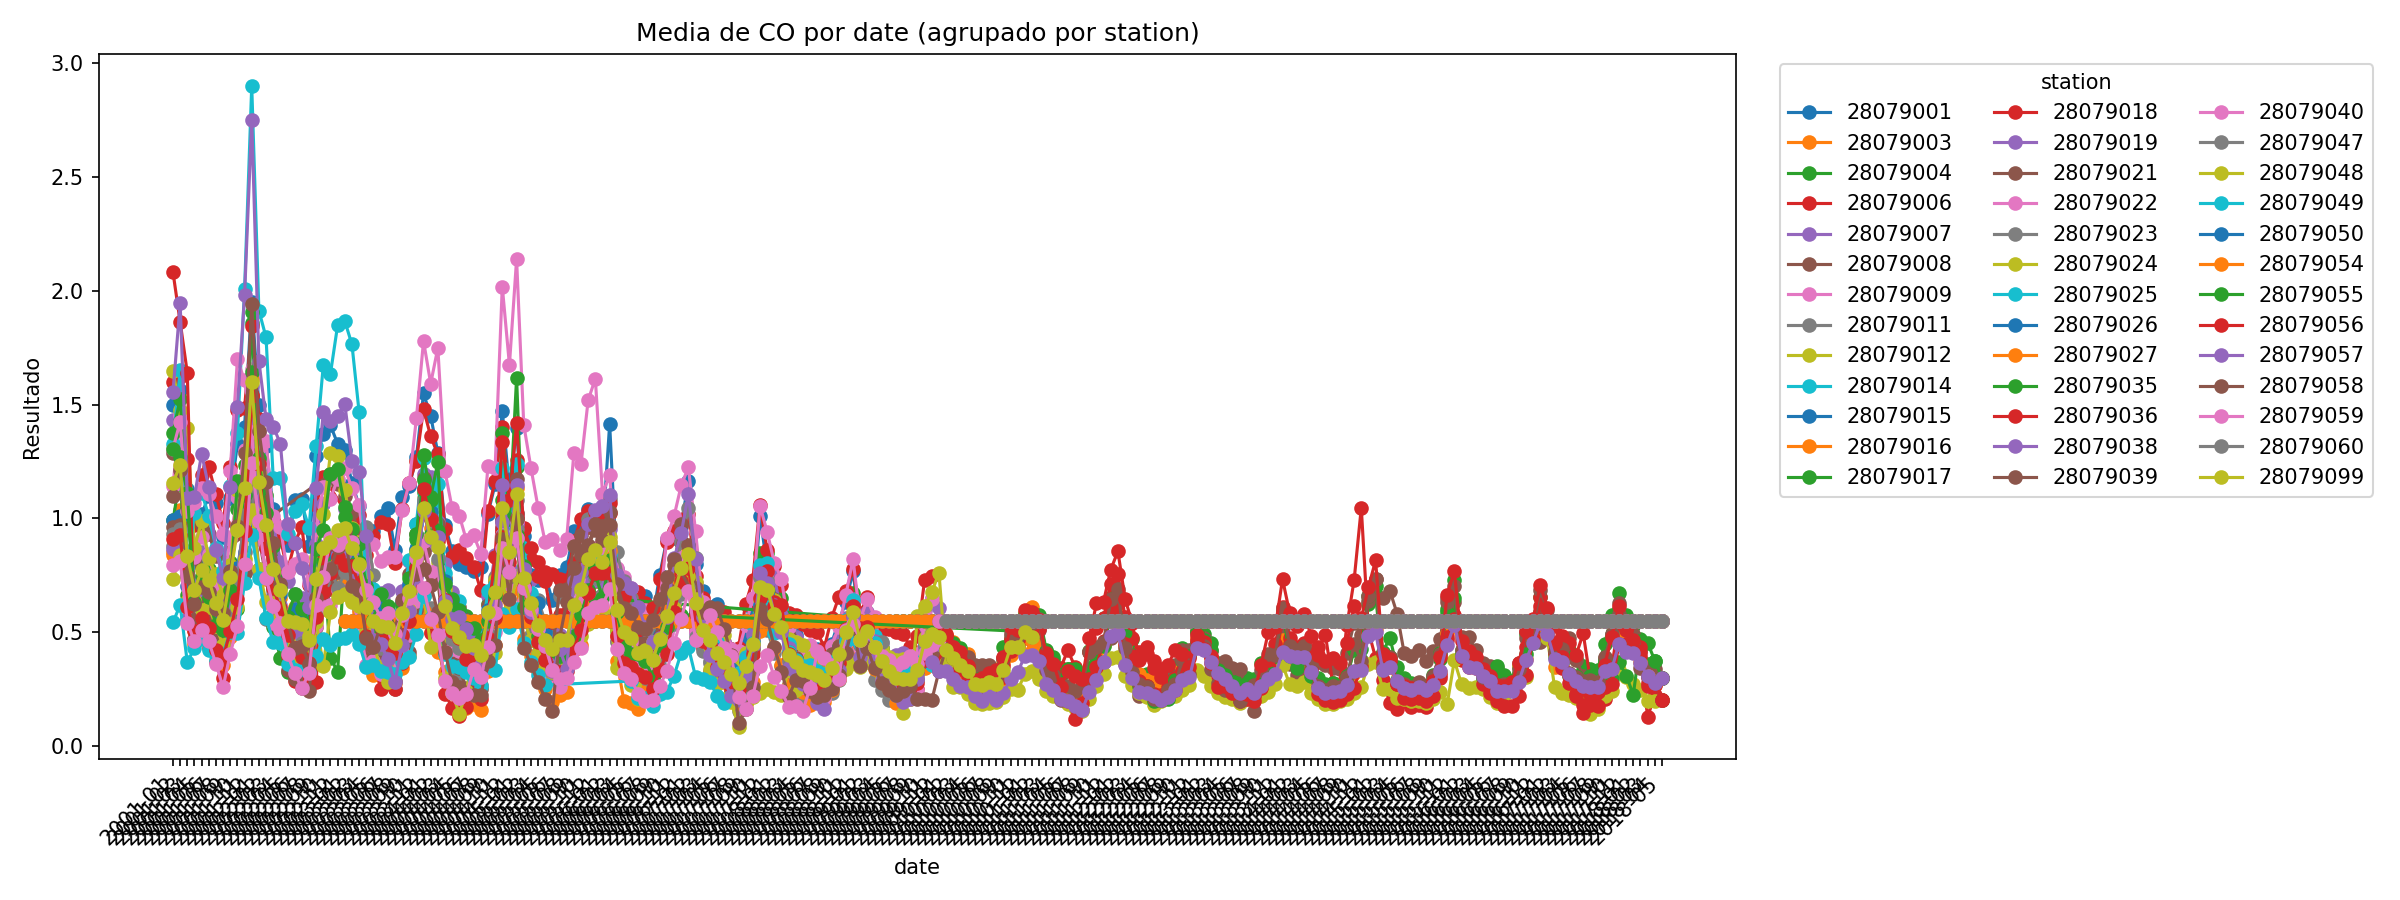

In [13]:
payload = {
    "tipo":               "Línea",
    "columna_x":          "date",
    "columna_y":          "CO",
    "agregacion":         "Media",
    "agrupacion_fecha":   "Mensual",
    "grupo":              "station"
}
print("→ Línea agrupada (Media mensual de CO por estación)")
show_plot(payload)